In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-07-10 18:39:09.028650: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 18:39:09.030890: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 18:39:09.033433: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 18:39:09.041496: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 18:39:09.056928: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [3]:
# load dataset

dataset = keras.datasets.fashion_mnist
((img_train, img_train_identifier), (img_tests, img_tests_identifier)) = dataset.load_data()
name_classifications = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa','Tênis', 'Bolsa', 'Bota']

img_train.shape, img_tests.shape, img_train_identifier.shape, img_tests_identifier.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

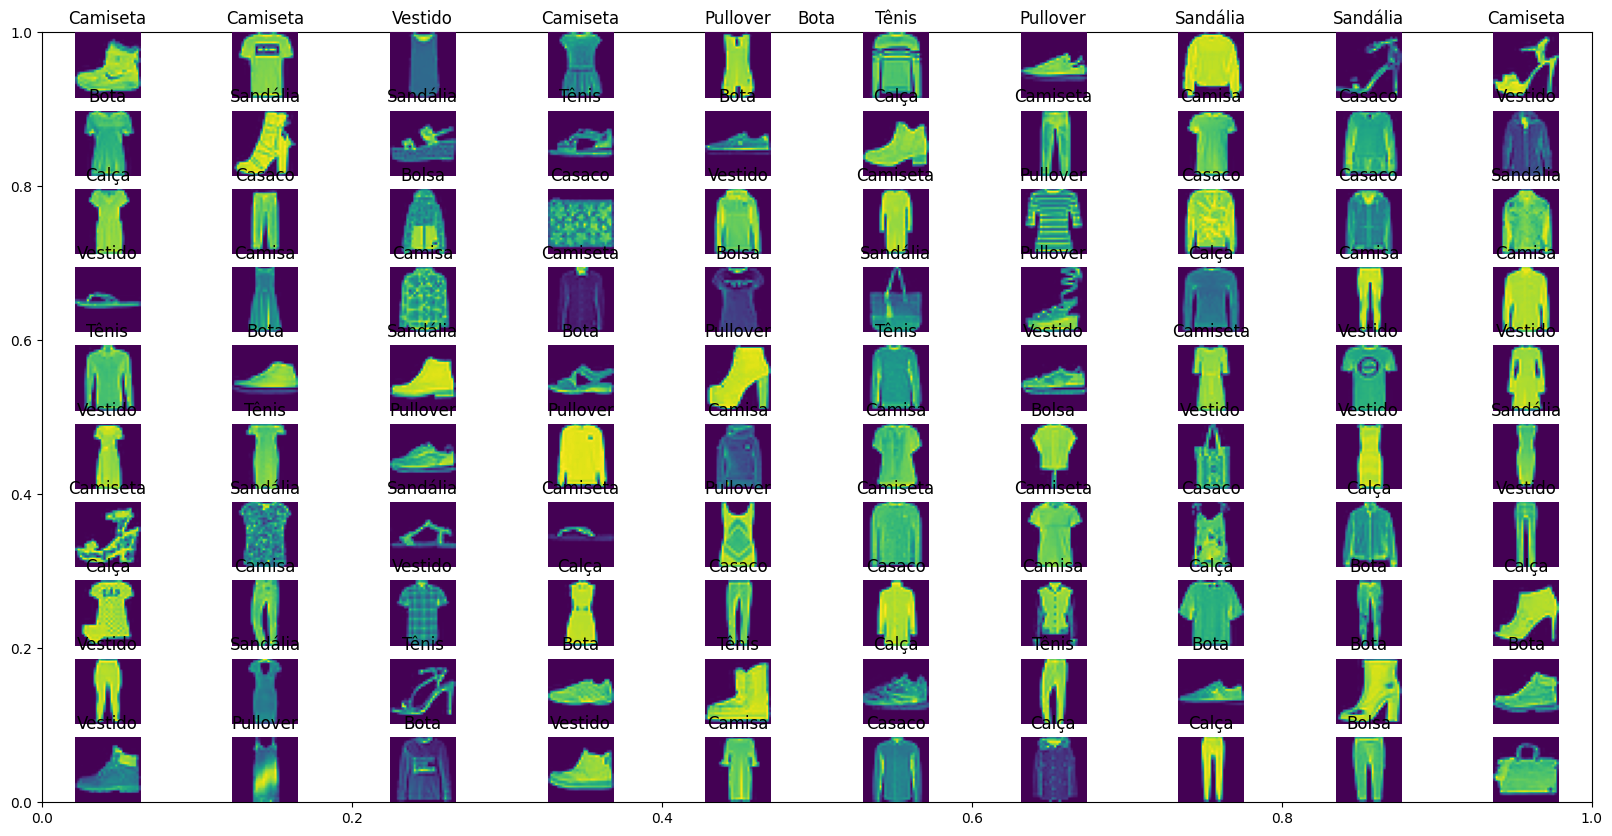

In [37]:
# show images

plt.figure(figsize=(20, 10))
for x in range(100):
    plt.title(f"{name_classifications[img_train_identifier[x]]}")
    plt.subplot(10, 10, x+1)
    plt.imshow(img_train[x])
    plt.axis('off')
plt.show()

# creating model and training

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu), # unit linear rectifier
    keras.layers.Dense(10, activation=tf.nn.softmax) # max of classification, with function softmax
])

model_compile = model.compile(optimizer='adam', loss='sparse_categorical_crossentropy') # entropia categorica cruzada esparsa
model.fit(img_train, img_train_identifier)

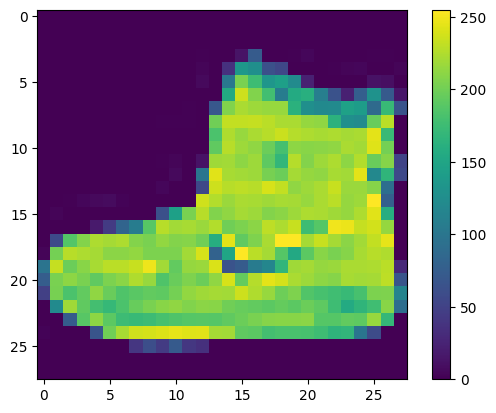

In [38]:
### let check the quality of the model per colors

plt.imshow(img_train[0])
plt.colorbar()

In [61]:
#normalization and training

img_train = img_train / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu), 
    keras.layers.Dropout(0.2), # 20% of the neurons will be disabled
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])
call_backs = [keras.callbacks.EarlyStopping(monitor='val_loss'),
              keras.callbacks.ModelCheckpoint(filepath='model.keras', save_best_only=True)]

learning_rate = .002
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model_compile = model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # entropia categorica cruzada esparsa
historic = model.fit(img_train, img_train_identifier, epochs=10, validation_split=.2, callbacks=call_backs)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0968 - loss: 2.3029 - val_accuracy: 0.0995 - val_loss: 2.3029
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0976 - loss: 2.3029 - val_accuracy: 0.1013 - val_loss: 2.3028
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1013 - loss: 2.3029 - val_accuracy: 0.0983 - val_loss: 2.3027
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0986 - loss: 2.3029 - val_accuracy: 0.0983 - val_loss: 2.3028


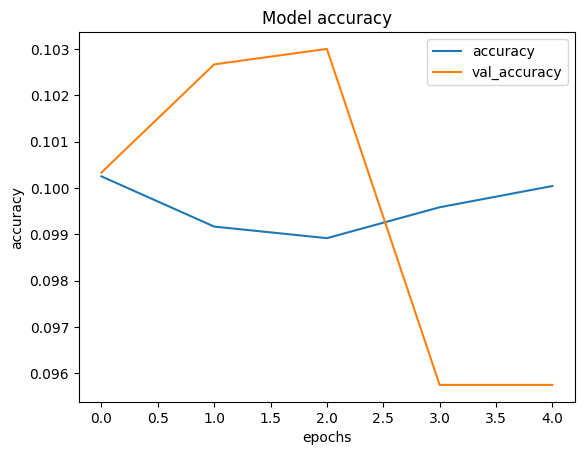

In [41]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy', 'val_accuracy'])

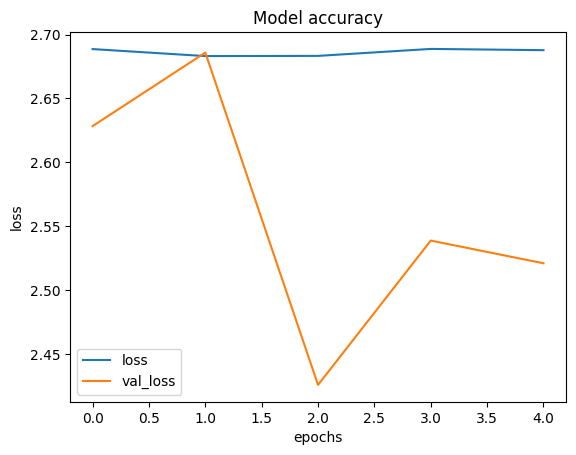

In [42]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])

plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'])

In [42]:
model.predict(img_tests)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


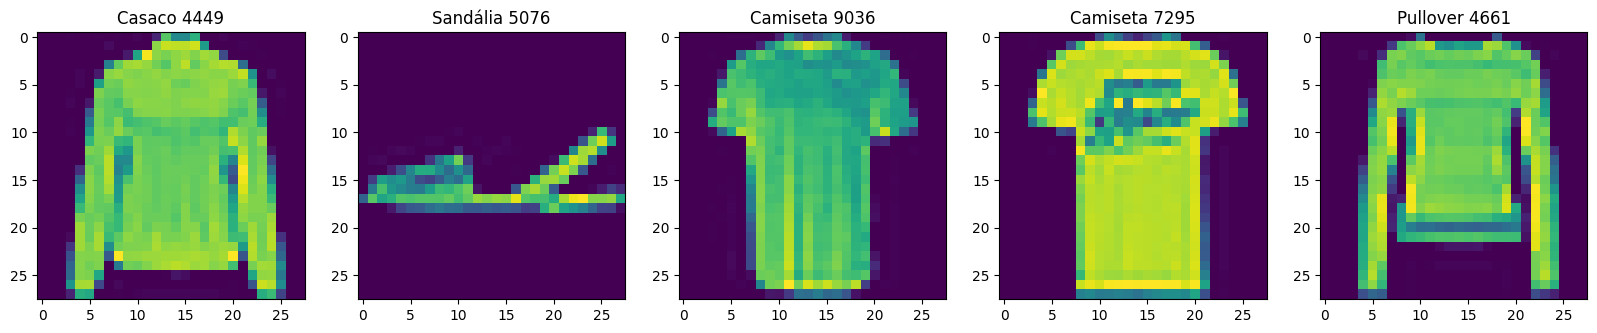

In [43]:
# test model

from random import randint


plt.figure(figsize=(20, 10))
for i in range(5):
    int_choice = randint(0, len(img_tests) - 1)
    img_to_predict = np.expand_dims(img_tests[int_choice], axis=0)
    img_predicted = model.predict(img_to_predict)
    predicted_label = np.argmax(img_predicted[0])
    
    plt.subplot(1, 5, i+1)
    plt.imshow(img_tests[int_choice])
    plt.title(f"{name_classifications[predicted_label]} {int_choice}")

In [44]:
model.evaluate(img_tests, img_tests_identifier)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8548 - loss: 59.1312


[63.71852493286133, 0.8500999808311462]

In [45]:
# save model

model.save('model.h5')

In [46]:
# load model
from tensorflow.keras.models import load_model


model_save = load_model('model.h5', custom_objects={'softmax_v2': tf.nn.softmax})

In [47]:
# resume model

print(28 * 28)
print(784 * 256 + 256)
model.summary()

784
200960


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

In [48]:
weights_layer_0_dense = model.layers[1].get_weights()[0]
vieses_layer_0_dense = model.layers[1].get_weights()[1]
weights_layer_0_dense.shape, vieses_layer_0_dense.shape

((784, 256), (256,))

### Below i am try substitute the vieses of the model, but i am not sure if it is correct
### Change the cell below to __python__ to run the code

weights_layer_0_dense_zeros = np.zeros(weights_layer_0_dense.shape)
weights_layer_0_dense_random = np.random.rand(weights_layer_0_dense.shape[0])

model.layers[1].set_weights((weights_layer_0_dense_zeros, vieses_layer_0_dense))
# model.layers[1].set_weights((weights_layer_0_dense_random, vieses_layer_0_dense))
model.layers[1].get_weights()

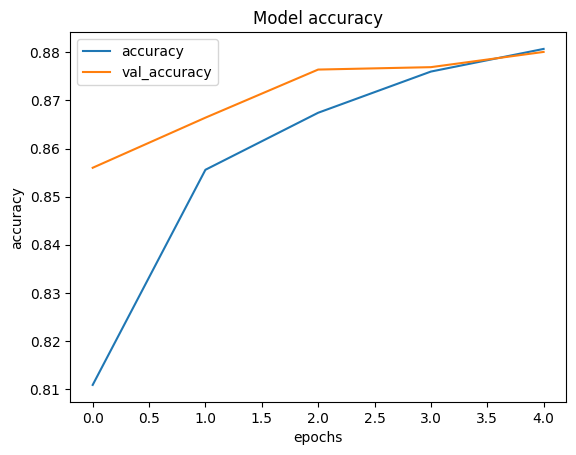

In [49]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy', 'val_accuracy'])

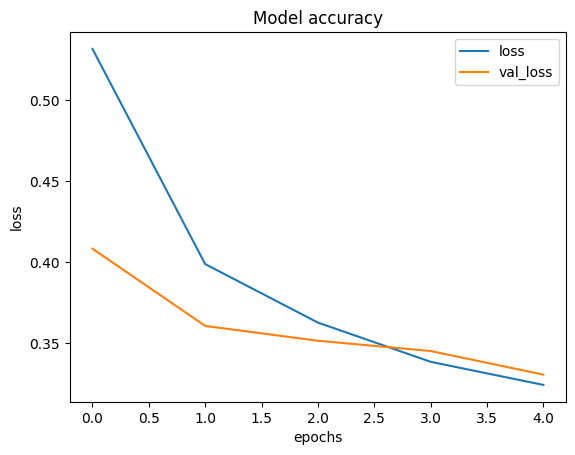

In [50]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])

plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'])

In [52]:
model.get_config()

{'name': 'sequential_2',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_2'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_2',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
  

from keras.preprocessing.image import img_to_array, load_img


imagem = load_img('/tmp/1.png', target_size=(28, 28), color_mode='grayscale')
imagem_array = img_to_array(imagem)
imagem_array_expandido = np.expand_dims(imagem_array, axis=0)

result = model.predict(imagem_array_expandido)
index_class = np.argmax(result, axis=1)

print(name_classifications[index_class[0]]) 
plt.imshow(imagem)
plt.show()